In [1]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('GS.csv',parse_dates= ['Date'])
df.set_index('Date',inplace=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-05-04,76.0000,77.250,70.0000,70.3750,54.440052,22320900
1999-05-05,69.8750,69.875,66.2500,69.1250,53.473076,7565700
1999-05-06,68.0000,69.375,67.0625,67.9375,52.554470,2905700
1999-05-07,67.9375,74.875,66.7500,74.1250,57.340931,4862300
1999-05-10,73.3750,73.500,70.2500,70.6875,54.681774,2589400


In [4]:
train_size = int(len(df)*0.8)
train_size
test_size = len(df)-train_size
test_size

1116

In [5]:
df2 = df[['Adj Close']]

In [6]:
df2 = df2.asfreq('b')

In [7]:
df2

,Adj Close
Date,
1999-05-04,54.440052
1999-05-05,53.473076
1999-05-06,52.554470
1999-05-07,57.340931
1999-05-10,54.681774
...,...
2021-06-24,368.750000
2021-06-25,368.769989
2021-06-28,368.709991


In [8]:
df2  = df2.fillna(method='ffill')

In [9]:
df_train = df2[:train_size]
df_train
df_test = df2[train_size:]
df_test

,Adj Close
Date,
2016-06-08,142.082199
2016-06-09,140.731583
2016-06-10,137.717941
2016-06-13,136.560257
2016-06-14,134.318420
...,...
2021-06-24,368.750000
2021-06-25,368.769989
2021-06-28,368.709991


In [10]:
sts.adfuller(df_train)

(-1.974337965583404,
 0.29793709832165816,
 10,
 4450,
 {'1%': -3.431820354190133,
  '5%': -2.8621897198837396,
  '10%': -2.567115849715945},
 20340.737330843032)

In [11]:
df_train_log = np.log(df_train)
df_train_log

,Adj Close
Date,
1999-05-04,3.997100
1999-05-05,3.979178
1999-05-06,3.961850
1999-05-07,4.049015
1999-05-10,4.001530
...,...
2016-06-01,4.990292
2016-06-02,4.985970
2016-06-03,4.963044


In [12]:
sts.adfuller(df_train_log)

(-2.5397852560478302,
 0.10609172474091338,
 30,
 4430,
 {'1%': -3.431826996210462,
  '5%': -2.8621926541301295,
  '10%': -2.567117411757512},
 -20490.90958080197)

In [13]:
df_diff_log = df_train_log - df_train_log.shift()

In [14]:
sts.adfuller(df_diff_log[1:])

(-10.704521011905255,
 3.4549889247567495e-19,
 29,
 4430,
 {'1%': -3.431826996210462,
  '5%': -2.8621926541301295,
  '10%': -2.567117411757512},
 -20481.065052541857)

Text(0.5, 1.0, 'Auto')

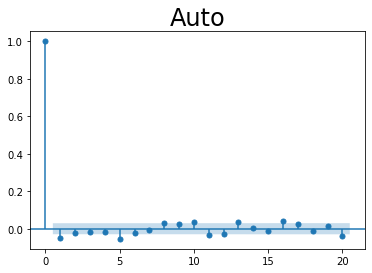

In [15]:
sgt.plot_acf(df_diff_log[1:],lags=20)
plt.title("Auto",size=24)

Text(0.5, 1.0, 'Partial Auto')

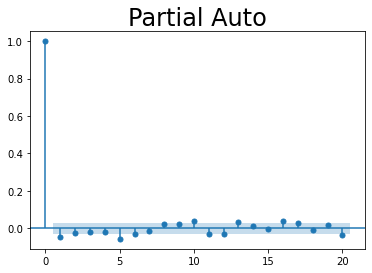

In [16]:
sgt.plot_pacf(df_diff_log[1:],lags=20)
plt.title("Partial Auto",size=24)

In [17]:
from pmdarima import auto_arima

In [18]:
model1 = ARIMA(df_train_log,order=(3,1,3))
result1 =model1.fit()

In [19]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 4460
Model:                 ARIMA(3, 1, 3)   Log Likelihood               10307.696
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sat, 25 Sep 2021   AIC                         -20599.392
Time:                        12:48:10   BIC                         -20548.169
Sample:                    05-05-1999   HQIC                        -20581.335
                         - 06-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.000      0.723      0.470      -0.000       0.001
ar.L1.D.Adj Close    -0.4088      0.077     -5.277      0.000      -0.561      -0.257
ar.L2.D.Adj Close    -0.2475      0.084     -2.942      0.003      -0.412      -0.083
ar.L3.D.Adj Close     0.6534      0.077      8.498      0.000       0.503       0.804
ma.L1.D.Adj Close     0.3623      0.071      5.072      0.000       0.222       0.502
ma.L2.D.Adj Close     0.1922      0.078      2.466      0.014       0.039       0.345
ma.L3.D.Adj Close    -0.7173      0.071    -10.074      0.000      -0.857      -0.578
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5552           -0.8483j            1.0138           -0.3422
AR.2           -0.5552           +0.8483j            1.0138            0.3422
AR.3            1.4891           -0.0000j            1.4891           -0.0000
MA.1           -0.5530           -0.8419j            1.0073           -0.3425
MA.2           -0.5530           +0.8419j            1.0073            0.3425
MA.3            1.3740           -0.0000j            1.3740           -0.0000
-----------------------------------------------------------------------------
"""

In [20]:
model0 = ARIMA(df_train_log,order=(0,1,1))
result0 = model0.fit()

In [21]:
result0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 4460
Model:                 ARIMA(0, 1, 1)   Log Likelihood               10294.691
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sat, 25 Sep 2021   AIC                         -20583.381
Time:                        12:48:12   BIC                         -20564.173
Sample:                    05-05-1999   HQIC                        -20576.610
                         - 06-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.000      0.632      0.528      -0.000       0.001
ma.L1.D.Adj Close    -0.0499      0.015     -3.245      0.001      -0.080      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           20.0249           +0.0000j           20.0249            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
def LLR_test(model1,model2,DF=1):
    l1 = model1.fit().llf
    l2 = model2.fit().llf
    lr = (2*(l2-l1))
    p = chi2.sf(lr,DF).round(3)
    return p

In [23]:
LLR_test(model0,model1)

0.0

In [24]:
model3 = ARIMA(df_train_log,order=(1,1,0))
result3 = model3.fit()

In [25]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 4460
Model:                 ARIMA(1, 1, 0)   Log Likelihood               10294.408
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sat, 25 Sep 2021   AIC                         -20582.817
Time:                        12:48:32   BIC                         -20563.608
Sample:                    05-05-1999   HQIC                        -20576.045
                         - 06-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.000      0.628      0.530      -0.000       0.001
ar.L1.D.Adj Close    -0.0472      0.015     -3.156      0.002      -0.077      -0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -21.1837           +0.0000j           21.1837            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
LLR_test(model3,model1)

0.0

In [27]:
diff= df_train_log -df_train_log.shift()

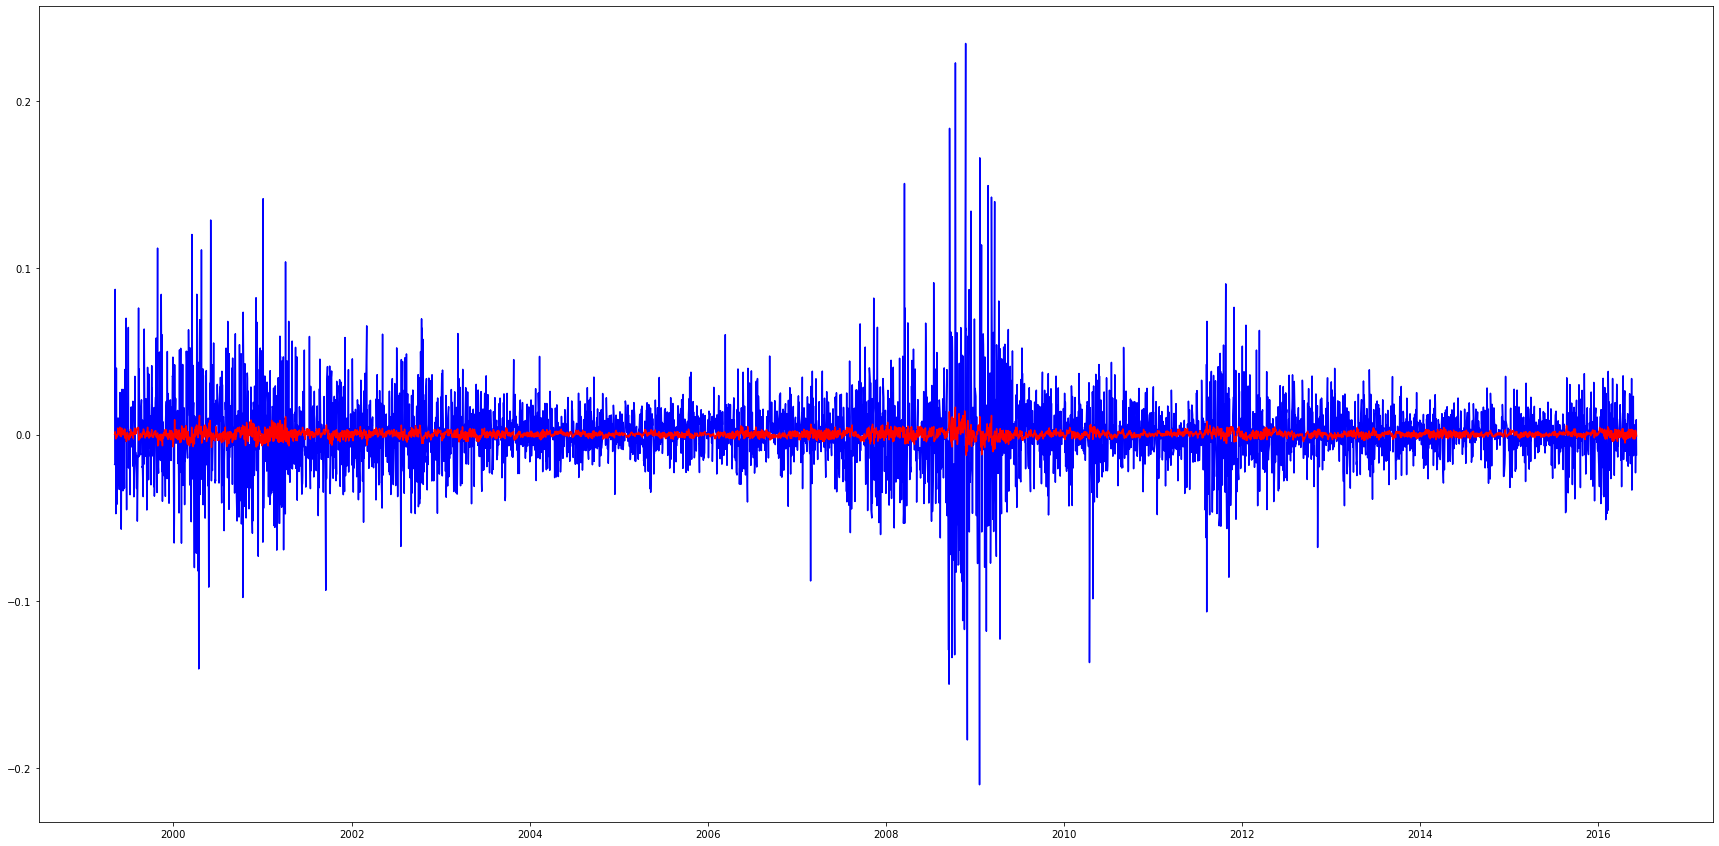

In [28]:
plt.figure(figsize = (30,15))
plt.plot(diff,color='Blue')
plt.plot(result1.fittedvalues,color='red')

In [29]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 4460
Model:                 ARIMA(3, 1, 3)   Log Likelihood               10307.696
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sat, 25 Sep 2021   AIC                         -20599.392
Time:                        12:48:52   BIC                         -20548.169
Sample:                    05-05-1999   HQIC                        -20581.335
                         - 06-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.000      0.723      0.470      -0.000       0.001
ar.L1.D.Adj Close    -0.4088      0.077     -5.277      0.000      -0.561      -0.257
ar.L2.D.Adj Close    -0.2475      0.084     -2.942      0.003      -0.412      -0.083
ar.L3.D.Adj Close     0.6534      0.077      8.498      0.000       0.503       0.804
ma.L1.D.Adj Close     0.3623      0.071      5.072      0.000       0.222       0.502
ma.L2.D.Adj Close     0.1922      0.078      2.466      0.014       0.039       0.345
ma.L3.D.Adj Close    -0.7173      0.071    -10.074      0.000      -0.857      -0.578
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5552           -0.8483j            1.0138           -0.3422
AR.2           -0.5552           +0.8483j            1.0138            0.3422
AR.3            1.4891           -0.0000j            1.4891           -0.0000
MA.1           -0.5530           -0.8419j            1.0073           -0.3425
MA.2           -0.5530           +0.8419j            1.0073            0.3425
MA.3            1.3740           -0.0000j            1.3740           -0.0000
-----------------------------------------------------------------------------
"""

In [30]:
pred_result1_diff = pd.Series(result1.fittedvalues,copy= True)
pred_result1_diff.head()

Date
1999-05-05    0.000217
1999-05-06    0.001019
1999-05-07    0.001684
1999-05-10   -0.002556
1999-05-11   -0.000020
Freq: B, dtype: float64

In [31]:
pred_result1_diff_sum = pred_result1_diff.cumsum()

In [32]:
pred_result1_diff_sum

Date
1999-05-05    0.000217
1999-05-06    0.001236
1999-05-07    0.002920
1999-05-10    0.000364
1999-05-11    0.000343
                ...   
2016-06-01    0.962866
2016-06-02    0.960797
2016-06-03    0.963425
2016-06-06    0.963845
2016-06-07    0.963050
Freq: B, Length: 4460, dtype: float64

In [33]:
pred_result1_log = pd.Series(df_train_log['Adj Close'].iloc[0],index=  df_train_log.index)
pred_result1_log

Date
1999-05-04    3.9971
1999-05-05    3.9971
1999-05-06    3.9971
1999-05-07    3.9971
1999-05-10    3.9971
               ...  
2016-06-01    3.9971
2016-06-02    3.9971
2016-06-03    3.9971
2016-06-06    3.9971
2016-06-07    3.9971
Freq: B, Length: 4461, dtype: float64

In [34]:
pred_result1_log = pred_result1_log.add(pred_result1_diff_sum,fill_value=0)

In [35]:
pred_result1_log

Date
1999-05-04    3.997100
1999-05-05    3.997317
1999-05-06    3.998336
1999-05-07    4.000020
1999-05-10    3.997464
                ...   
2016-06-01    4.959966
2016-06-02    4.957897
2016-06-03    4.960525
2016-06-06    4.960945
2016-06-07    4.960150
Freq: B, Length: 4461, dtype: float64

In [36]:
pred_ARIMA = np.exp(pred_result1_log)

In [37]:
pred_ARIMA


Date
1999-05-04     54.440052
1999-05-05     54.451859
1999-05-06     54.507383
1999-05-07     54.599265
1999-05-10     54.459864
                 ...    
2016-06-01    142.588956
2016-06-02    142.294238
2016-06-03    142.668696
2016-06-06    142.728663
2016-06-07    142.615199
Freq: B, Length: 4461, dtype: float64

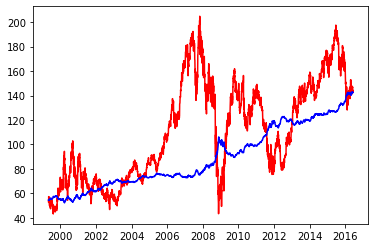

In [38]:
plt.plot(df_train,color='Red')
plt.plot(pred_ARIMA,color='Blue')

In [39]:
test_pred = result1.predict(start=4461,end=5782,dynamic=True)
test_pred = pd.DataFrame(test_pred)
test_pred

,0
2016-06-08,0.003847
2016-06-09,-0.000801
2016-06-10,-0.000204
2016-06-13,0.003013
2016-06-14,-0.001487
...,...
2021-06-25,0.000217
2021-06-28,0.000217
2021-06-29,0.000217
2021-06-30,0.000217


In [40]:
first = pred_result1_log[len(pred_result1_log)-1]
first

4.960150089118561

In [41]:
first
test_pred.iloc[0] += first
test_pred

,0
2016-06-08,4.963998
2016-06-09,-0.000801
2016-06-10,-0.000204
2016-06-13,0.003013
2016-06-14,-0.001487
...,...
2021-06-25,0.000217
2021-06-28,0.000217
2021-06-29,0.000217
2021-06-30,0.000217


In [42]:
df_test_log = np.log(df_test)

In [43]:
df_test_log

,Adj Close
Date,
2016-06-08,4.956406
2016-06-09,4.946854
2016-06-10,4.925208
2016-06-13,4.916766
2016-06-14,4.900213
...,...
2021-06-24,5.910119
2021-06-25,5.910173
2021-06-28,5.910010


In [44]:
test_pred = test_pred.cumsum()
test_pred

,0
2016-06-08,4.963998
2016-06-09,4.963197
2016-06-10,4.962993
2016-06-13,4.966006
2016-06-14,4.964519
...,...
2021-06-25,5.250110
2021-06-28,5.250327
2021-06-29,5.250544
2021-06-30,5.250761


In [45]:
test_ARIMA = np.exp(test_pred)
test_ARIMA

,0
2016-06-08,143.164961
2016-06-09,143.050396
2016-06-10,143.021210
2016-06-13,143.452760
2016-06-14,143.239636
...,...
2021-06-25,190.587266
2021-06-28,190.628600
2021-06-29,190.669943
2021-06-30,190.711295


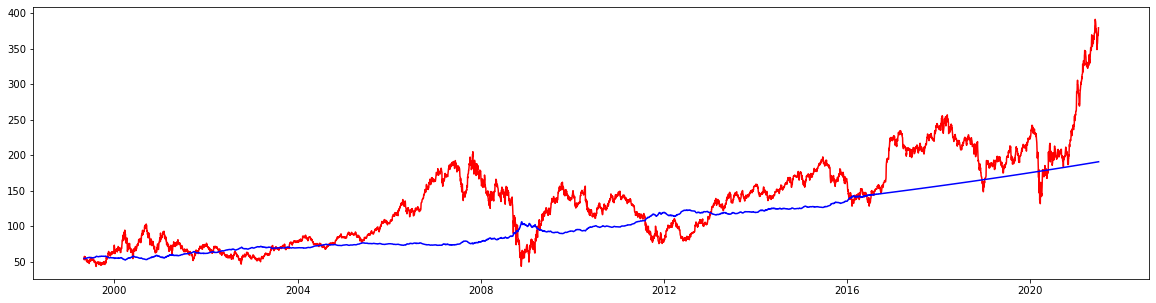

In [46]:
plt.figure(figsize=(20,5))
plt.plot(df_train,color='Red')
plt.plot(df_test,color='Red')
plt.plot(pred_ARIMA,color='Blue')
plt.plot(test_ARIMA,color='Blue')